# SymPy で線形化

In [80]:
import sympy as sym
import numpy as np
from sympy import exp, sin, diff, pi
from sympy.abc import x, y, z
import matplotlib.pyplot as plt

## Taylor 展開

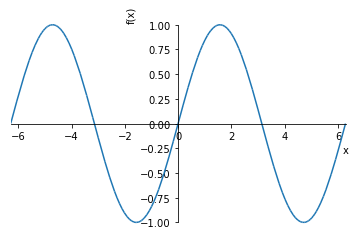

In [27]:
sym.plot(sin(x), (x, -2*pi, 2*pi))
plt.show()

In [71]:
order = 4
df = [sin(x)]

for _ in range(order):
    df.append(diff(df[-1], x))
df

[sin(x), cos(x), -sin(x), -cos(x), sin(x)]

In [88]:
df_at0 = [f.subs(x, 0) for f in df]
df_at0 

[0, 1, 0, -1, 0]

In [109]:
fac = [1]
for n in range(1, order + 1):
    fac.append(fac[-1] * n)
fac

[1, 1, 2, 6, 24]

In [110]:
coef = [cn / nfac for (cn, nfac) in zip(df_at0, fac)]

In [111]:
f_aprx = sum(coef[n] * x**n for n in range(order+1))
f_aprx

-x**3/6 + x

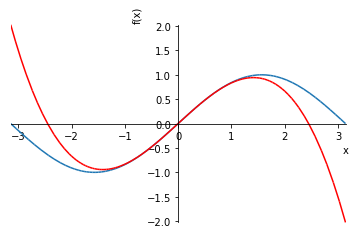

In [112]:
p = sym.plot((f, (x, -pi, pi)), (f_aprx, (x, -pi, pi)) , show=False)
p[1].line_color = 'r'
p.show()